# **Pointers for the Original OxNetDiffusion Notebook**

This notebook contains the same information as the original notebook. However, the ordering of the content has been slightly altered. Additionally, it contains some more information regarding the functions used and breaks down the steps of the fundamental functions. 


In [ ]:
#Required modules for this project.
#If you get an error on any of this, you need to look at your installation of python and jupyter. 
#You will need to google how you can install matplotlib, numpy and scipy. 
#If you run this cell and get an error, you need to fix this 
#before you can make any progress!

from matplotlib import pyplot as plt  #import matplotlib
import numpy                          #import numpy
import math
from IPython.display import display, Markdown
from scipy.optimize import leastsq

In [ ]:
#constants set for project (will not vary!)
delta=3E-3        #The duration for which the gradients are applied: s
Delta=0.1         #A delay in the experiment: s
Gmax=6000         #This is the maximum gradient strength of the magnet: G m-1
gamma= 2.67522E4  #The proton Gyromagnetic ratio:  rad s-1 G-1
kb=1.381E-23      #Boltzmann's constant: Js-1 
pi=numpy.pi       #3.14159...
nu=1E-3           #the viscosity of water at 25oC
T0=273.19         #The temperature in K of 0oC
T=25              #the temperature where we ran these experiments (25oC): oC

# Aim: Determine $D_T$ and calculate the constant $\eta$ to assess whether a protein is folded or unfolded. 

This will be achieved by using some experiemental data that conatins $I$ versus $G$ datapoints for a specific protein of a known mass $M_w$. By using python code that uses a 'least squares' algorithm to fit our model to the data, we will calculate the diffusion coefficients $D_T$ for each protein. Based of this value, we will figure out $\eta$, which we will then interpret in terms of 'folded' or 'unfolded'. You will then research two specific proteins on this list and write a short paragraph explaining why it is likley that being folded or unfolded is important for these proteins inside the cell.

I have python code here to do challenges 1 and 2. You can use the functions I provide, but you should 'play' with them and make sure you understand them. With not much work, you can turn these basic functions into code that can fit any model you can think of to any experimental data. So this is well worth your time! You understand this code, and you understand data analysis and model fitting in the physical sciences.

You will need to run each of the python boxes in the worksheet so that the system 'knows' about the modules it needs, the we need constants and the various functions I have defined. 

# Stejskal-Tanner equation
Use these equations to find $D_T$ (diffusion coefficient).

$I=I_0 \exp(-k D_T)$

$k=\gamma^2\delta^2 G^2 \left(\Delta - \frac{\delta}{3}\right)$

During the NMR experiment we measure signal $I$ for a range of values of $G$, where $\delta$ and $\Delta$ remain constant.

Therefore, by plotting the signal $I$ as a function of $k$, we can use a program to determine $D_T$ by using the 'best fitting model'.

# Radius of Hydration Equations

This equation tells us the approximate size of a dissolved protein in units of Angstroms $\mathring A$, where 1 $\mathring A$ is equal to 10$^{-10}$m

$R_H= a N^b$, where $N$ is the number of residues in the protein and $a$ and $b$ are constants

The value of the constants depend on if the protein is folded or unfolded.

If $R_H^{\mathrm{unfolded}}$ then $a = 2.21$  and $b = 0.57$

If $R_H^{\mathrm{folded}}$ then $a = 4.75$  and $b = 0.29$ 


For a **folded protein** we can expect $R_H\propto N^{1/3}$ (0.29 is close to 0.33)


# Einstein-Stokes Equation

This equation relates the radius of hydration, $R_H$, to the translational diffusion coefficient, $D_T$:

$D_T = \frac{k_B T}{6 \pi \nu R_H}$

$k_B$ is the Boltzmann constant, $T$ is temperature, and $\nu$ is the viscosity of the solution.


# Deriving $\kappa$ for folded or unfolded proteins

**Step 1:** substitute the Radius of Hydration into the Einstein-Stokes equation  

$R_H= a N^b$ 

$D_T = \frac{k_B T}{6 \pi \nu R_H}$

$D_T = \frac{k_B T}{6 \pi \nu a N^b }$

we can say that $D_T\propto 1/R_H$ as $ \frac{k_B T}{6 \pi \nu }$, $a$ and $b$ can all assumed to be constant

Therefore, if we measure $D_T$, we can in turn calculate the value of $R_H$ 

**Step 2:** Convert the units of radius of hydration

$D_T = \frac{k_B T}{6 \pi \nu a N^b \times 10^{-10}}$

Here we used 10$^{-10}$ to convert the radius of hydration into units of metres, so that $D_T$ has units of m$^2$ s$^{-1}$ 

**Step 3:** Convert number of residues in a protein $N$ into the protein's molecular weight $M_W$

$D_T = \frac{k_B T}{6 \pi \nu a \left(\frac{M_W}{110.} \right)^b \times 10^{-10}}$

The 'average' molecular weight of an amino acid is 110 g mol$^{-1}$. This means that $M_W= 110 \times N$

**Step 4:** Simplify our expression

$D_T = \kappa M_W^{-b}$

where the complicated constant $\kappa$ is everything else left over:

$\kappa= \frac{k_B T }{6 \pi \nu a }110^b \times 10^{10}$


**Step 5:** Calculate $\kappa$ for a folder or unfolded protein

$\kappa= \frac{k_B T }{6 \pi \nu a }110^b \times 10^{10}$

Therefore, we can use this equation to caculate the constant $\kappa$ for a folder or unfolded protein

**Task 1:** Calculate the value of $\kappa$ for an unfolded, and an unfolded protein using the values of $a$ and $b$ above. 

# Calculating the constant $\eta$

$\eta$ is a constant that can relate our experimental value of $D_T$ to the molecular weight $M_W$ of a protein to find out whether it is in a folded or an unfolded state:

$D_T^{\mathrm{experiment}}=\eta D_T^{\mathrm{folded}} + (1-\eta) D_T^\mathrm{unfolded}$

This constant $\eta$ can hold a value between 0 to 1

**Task 2:** prove that when $\eta$ is equal to 1, our expermental value is equal to the folded value, and when $\eta$ is equal to 0, our experimental value is equal to the unfolded value.

Additionaly, it is possible to rearrange the above equation in order to find the value of $\eta$:

$\eta=\frac{D_T^{\mathrm{experiment}}-D_T^\mathrm{unfolded}}{ D_T^{\mathrm{folded}}-D_T^\mathrm{unfolded}   }$

**Task 3:** prove that this rearrangment is possible

Therefore, based on the above equation we can calculate $\eta$ if we know the experimental measure of $D_T$, and we know the molecular weight of the protein $M_W$

$D_T = \kappa M_W^{-b}$

where the constant $\kappa$ has different values depending on whether the protein is folded or unfolded

$\kappa^{\mathrm{folded}}$ = $1.798^{-9}$

$\kappa^{\mathrm{unfolded}}$ = $1.441^{-8}$

Using this value of $\eta$ can then tell us whether our protein is in a folded or unfolded state

# Theory of Protein Diffusion

From the Einstein-Stokes equation we can say that $D_T$ increases when: we heat things up (increase $T$), if we reduce the viscosity of the solution (lower $\nu$) or if we make our object smaller (lower $R_H$).

Based on this, would you expect a folded or unfolded protein to diffuse further in a given time?

# Challenge 1: Calculate the experimental value of $D_T$ 

**Method:**

From the data we have read in, we will extract the $G$ and the $I$ values from the first and second columns respectively. We will then fit this data to the Stejskal-Tanner equation using a 'least-squares' algorithm to get optimised (best fitting) values of $I_0$ and $D_T$ and their errors.

**Useful info:**

There are five files with this project, called proteinX.out, where X goes from 1 to 5. The raw data files contain two "columns" of information, I (signal) and G (strength of magnetic field). However, this raw data is actually in a text file with each line having a corresponding I and G separated by "whitespace" for each datapoint.

The molecular weights of these five proteins are, in units of g mol$^{-1}$:

1. 22123
2. 118250
3. 14230  
4. 4500000
5. 623220

**Step 1: Visualise the contents of the raw data file** 

The showfile() function will print the contents of the file to the screen. This is a good way to check the input data you are using.

In [ ]:
def showfile(infile): #function to print the contents of a data file to the screen.
    print("Showing contents file: %s" % infile)
    text_file = open(infile)
    file_content = text_file.read()
    print(file_content)
    text_file.close()


In [ ]:
# Use the showfile function to see what data is stored in protein1.protein1.FutureWarning
print(showfile("protein1.out"))

**Step 2: Read in the raw data files into python** 

The Readin() function ultimately creates two lists of data containing the $I$ versus $G$ datapoints for a file. 

You can use this function to read in the data for each of your proteins of interest.

In [ ]:
def Readin(infile): #function to read in a data file
    G=[]  #initialise a list to store G values
    I=[]  #initialise a lsit to store I values
    inny=open(infile) #open a 'stream' an interface to the file.
    for line in inny.readlines():  #loop over all lines in the file
        #print(line)      #uncomment this to see what it does
        test=line.split()  #this line splits the line into fields separated by 'whitespace'
        #print(test)      #uncomment this to see what it does
        if(len(test)>0): #make sure that the line has some information in!
            G.append(float(test[0])) #add the G value to the list
            I.append(float(test[1])) #add the I value to the list
    G=numpy.array(G)  #turn into a 'numpy' array
    I=numpy.array(I)  #turn into a 'numpy' array
    return G,I  

In [ ]:
# Use the Readin function to obtain an array of I and G values for your protein of interest1
protein1_data = Readin("protein1.out")

print(protein1_data)

**Step 3: Calculate the constant $k$ the Stejskal-Tanner equation**

$k=\gamma^2\delta^2 G^2 \left(\Delta - \frac{\delta}{3}\right)$

For each value of $G$ in the array, calculate the corresponding constant $k$ using the CalcK function

In [ ]:
def CalcK(G,gamma,delta,Delta): #calculate 'k' values from an array of G values using the constants
    return (G*delta*gamma)**2.*(Delta-delta/3.)

In [ ]:
# use the CalcK function to calculate the corresponding constant k for each G value in our array

# create a numpy array of G values for our protein
# this corresponds to the first element of protein1_data
G_array = protein1_data[0]

# as we are using numpy arrays, we input our G_array into the CalcK function to create an array of constant values
K_array = CalcK(G_array,gamma,delta,Delta)

print(G_array)
print(K_array)

**Step 4: Create model for the Stejskal-Tanner equation**

$I=I_0 \exp(-k D_T)$

The CalcModel function, returns the output of the Stejskal-Tanner equation for when you have known values for $I_0$, $k$, and $D_T$.

Therefore, as we do not have known values for $I_0$, and $D_T$, we can not use this function yet. But this will be used when we try to guess the values for $I_0$, and $D_T$

In [ ]:
#evaluate the Sketjal-Tanner equation for the specified array of k, and constants I0 and DT.
def CalcModel(k,I0,DT):   
    return I0*numpy.exp(-k*DT)

**Step 5: Find optimised (best fitting) values of $I_0$ and $D_T$ and their errors.**

The below functions are used to calculate values of $I_0$ and $D_T$ by a least squares fitting. Please refer to the lecture slides which go into more detail about these functions.

As a basic overview, the functions are doing the following:

1. Guess an intial value for $I_0$ and $D_T$
2. Check how close these estimates are to your real data, when passed through CalcModel
3. Based on how close these estimates are, attempt a new guess
4. Repeat until optimised values of $I_0$ and $D_T$ are found


In [ ]:
#functions for doing the least squares fitting.

def chifunc(x,b):  #calculate the model for current settings, and return the 'chi' array, ycalc-ydata
    """Determines how close the current guess is"""
    #print(x,b)
    I0=x[0]  #unpack fitting parameter 1
    DT=x[1]  #unpack fitting parameter 2
    k=b[0]   #unpack argument 1
    I=b[1]   #unpack argument 2
    guess= CalcModel(k,I0,DT) 
    guess_difference = guess - I #how far is our guess away from the value of I in the raw data file
    return guess_difference      #return ycalc-ydata
    
def FitModel(I0guess,DTguess,k,I,verbose=False): #function to fit model (DT,I0 pars) to data (k,I)
    """Use leastsquares to fit the model to the data and find associated error values"""
    
    #don't worry if you don't understand these two lines
    xinit=I0guess,DTguess
    #print("xinit ",xinit)
    pfit,pcov,infodict,errmsg,success=leastsq(chifunc,xinit,args=[k,I,],full_output=1) # the line that does the magic!

    #now we calculate the standard error from the fitting procedure
    #the maths of this is quite complicated. The code is also complex as it has been
    #generalised to deal with a range of problems that may occur, that
    #are not specifically relevant to this project.
    if (len(I) > len(xinit)) and pcov is not None:
        s_sq = (chifunc(pfit,[k,I,])**2).sum()/(len(I)-len(xinit))
        pcov = pcov * s_sq
    else:
        pcov = numpy.inf

    #now we calculate the error.
    error = [] 
    for i in range(len(pfit)):
        try:
          error.append(numpy.absolute(pcov[i][i])**0.5)
        except:
          error.append( 0.00 )
    perr = numpy.array(error) 
    
    #if the 'verbose' flag is set to true, print this to screen.
    if(verbose):
        print("These are the fitted parameters:")
        print("I0=",pfit[0],"+/-",perr[0])
        print("DT=",pfit[1],"+/-",perr[1])
        display(Markdown(rf'  Fitted D:   %.2e $\pm$ %.2e 'r'cm$^2$s$^{-1}$' % (pfit[0],pfit[1])))    
    return pfit[0],pfit[1],perr[0],perr[1]

**Make sure you understand the principles behind the above functions!**

The above functions are used to calculate values of $I_0$ and $D_T$ by a least squares fitting. In the cell below, I am providing you with a case example of how these functions can be used to find the optimised (fitted) of $I_0$ and $D_T$ for protein1.


In [ ]:
# Use FitModel to find the optimised values of I0 and DT for protein1

# step 1: read in our file
file = "protein1.out"

protein1_data = Readin(file)

# step 2: create seperate numpy arrays for I and G values
G_array = protein1_data[0]
I_array = protein1_data[1]

# step 4: convert our G values into their correct form (see second powerpoint - G/Gmax=g)
#G_array = G_array * Gmax

# step 5: create a numpy array for the constant K 
K_array =  CalcK(G_array,gamma,delta,Delta)

# step 6: define initial guess values - don't worry about where these came from!
I0_guess = 2E6
DT_guess = 1E-8

# step 7: fit the model to our guess values, and return the fitted values and associated errors

fitted_model = FitModel(I0_guess, DT_guess, K_array, I_array)

#get optimised "fitted" values 
I0_fit = fitted_model[0]
DT_fit = fitted_model[1]

#get erros for the optimised "fitted" values 
I0_err = fitted_model[2]
DT_err = fitted_model[3]

#return model outputs
print(I0_fit, DT_fit, I0_err, DT_err)

#check outputs
I_fitted = CalcModel(K_array, I0_fit, DT_fit)

print(I_fitted, I_array)

**Step 6: Plot data and return stats summaries**

The below functions are used for plotting data and making pretty summaries.

In [ ]:
#DT will be in units of m2 s-1
def SimData(DTsim): #give this function a list of different diffusion coefficients 
    """Returns a plot of different DT values on the same graph"""
    fig=plt.figure()                  #setup the plot
    ax=fig.add_axes([0,0,1,1])        #setup the plot
    G=numpy.linspace(0,1,20)   #calculate an arbitrary range of Gradients from 0 to 100% of maximum (0-1)
    I0=1E6                             #arbitrary I0 value           
    ax.set_ylim(0,1.05)               #set yrange from 0, to just above the max number (1.0)
    ax.set_xlabel("G/Gmax")           #set the Xlabel
    ax.set_ylabel("I/I0")             #set the Ylabel

    for DT in DTsim:  #loop over all the test DT values in the list sent to function (DTsim)
        k=CalcK(G*Gmax,gamma,delta,Delta)  #calc the 'k' values
        I=CalcModel(k,I0,DT)               #simulate the model
        I0fit,DTfit,I0err,DTerr=FitModel(2E6,1E-12,k,I) #fit the simulated model to get a nice line
        Ifit=CalcModel(k,I0fit,DTfit)      #back-calculate the simulated data for plotting

        label='%.2e m^2s^{-1}'% DT
        ax.scatter(G,I/I0)   #make the plot of data (points)
        ax.plot(G,Ifit/I0fit,label=label)   #make the plot of data (lines)
    ax.legend(loc='lower left')
        
def SetFig():
    """Creates blank plot for data to be added to later"""
    fig=plt.figure()                  #setup the plot
    ax=fig.add_axes([0,0,1,1])        #setup the plot
    ax.set_ylim(0,1.05)               #set yrange from 0, to just above the max number (1.0)
    ax.set_xlabel("G/Gmax")           #set the Xlabel
    ax.set_ylabel("I/I0")             #set the Ylabel
    return fig,ax    

        
def FitFile(file,verbose=False,ax=None): #give this function a list of different diffusion coefficients 
    """For a file of data, retrun the fitted model and plot the results"""
    G,I=Readin(file)       #read in text file using our own code
    
    if(verbose): #if verbose is set to true, then initialise a stand-alone figure
         fig,ax=SetFig() #otherwise code assumes SetFig has been called already to get a multi-plot

    k=CalcK(G*Gmax,gamma,delta,Delta)  #calc the 'k' values
    I0fit,DTfit,I0err,DTerr=FitModel(2E6,1E-8,k,I,verbose=verbose) #fit the simulated model to get a nice line
    Ifit=CalcModel(k,I0fit,DTfit)      #back-calculate the simulated data for plotting
    I0=1E6
 
    ax.scatter(G,I/I0)   #make the plot of data (points)
    ax.plot(G,Ifit/I0fit,label=file)   #make the plot of data (lines)

    if(verbose): #show legend if just making a single plot
        ax.legend()

    return DTfit,DTerr  #return fitted diffusion coefficient
       
    


# Challenge 2: Calculate the value of $\eta$ for our protein 

**Method**

Turn the fitted $D_T$ values into $\eta$ values and find out if the protein is folded or not.

**Useful equations**

$\eta=\frac{D_T^{\mathrm{experiment}}-D_T^\mathrm{unfolded}}{ D_T^{\mathrm{folded}}-D_T^\mathrm{unfolded}   }$

$D_T = \kappa M_W^{-b}$

where the constant $\kappa$ has different values depending on whether the protein is folded or unfolded

$\kappa^{\mathrm{folded}}$ = $1.798^{-9}$

$\kappa^{\mathrm{unfolded}}$ = $1.441^{-8}$


In [ ]:
def ExpectedD(Mw,DT,DTerr,verbose=False): #print diffusion coefficients to the screen for folded and unfolded for the given molecular weight.
    """Given the MW of a protein, calculate the folded and unfolded DT values,
    and use these to calculate the constant n amd its associated error"""
    from IPython.display import display, Markdown
    
    #The two results from Wilkins et al.
    #Rh unfolded =2.21*(Mw/110.)** 0.57 #in Angstroms
    #Rh folded=4.75*(Mw/110.)** 0.29    #in Angstroms
    #D=k T/(6 pi nu R)  #Stokes Einstein equation #units of m^2s-1 for D
    #Average molecular weight of an amino acid = 110 g mol-1

    kfol=kb* (T0+T)* 110**0.29 /(6* pi* nu* 4.75 *1E-10)  #conversion factors from Einstein-Stokes
    kunf=kb* (T0+T)* 110**0.57 /(6* pi* nu* 2.21 *1E-10)   #conversion factors from Einstein-Stokes
    Dfol=kfol*(Mw)**(-0.29)  
    Dunf=kunf*(Mw)**(-0.57)
    #print(kfol,kunf)
    fac=(DT-Dunf)/(Dfol-Dunf)  #back calulating the unfolded fraction.
    facErr=(DTerr**2.*(1./(Dfol-Dunf))**2.)**0.5 
    if(verbose):
        display(Markdown(rf'  Expected D (unfolded): %.2e 'r'm$^2$s$^{-1}$' % (Dunf)))
        display(Markdown(rf'  Expected D (folded):   %.2e 'r'm$^2$s$^{-1}$' % (Dfol)))    
        display(Markdown(rf'  Folded factor $\eta$:   %.4f $pm %.4f' % (fac,facErr )))  #propagating the error, so fractional error in DT->fraction error in fac  
    return fac,facErr
        

# Challenge 3: Interpret the results 
Research two specific proteins on this list and write a short paragraph explaining why it is likley that being folded or unfolded is important for these proteins inside the cell.

Protein 3 is called $\alpha$-Synuclein, a protein that acts as a neurotransmitter in the brain. This protein, when it aggregates with itself in an abberant fashion, is associated with Parkinson's disease. Protein 4 is a ribosome assembly and is extreamly large, for a protein complex. For these two proteins, find out what they are supposed to do, and say how your result that shows whether they are folded or unfolded, might be related to their function.

# Extended Computational Tasks

In [ ]:
#COMPUTATIONAL TASK 1: put in different values of the diffusion coefficient and simulate the diffusion curves.
#How does the data vary when you put in different diffusion coefficients?
SimData((1E-12,1E-11,1E-10,1E-9))

#are there upper and lower limits to the diffusion coefficients that can be measared using this method?
#how could the constants delta and Delta be adjusted to help with this?
#if you vary delta and Delta to change these plots (you should!), make sure you set the values back to 
#where they started before you move on.


These are the fitted parameters:
I0= 1002337.3009981833 +/- 3059.1788964155276
DT= 6.25574659564405e-11 +/- 5.369475146606367e-13


  Fitted D:   1.00e+06 $\pm$ 6.26e-11 cm$^2$s$^{-1}$

  Expected D (unfolded): 6.18e-11 m$^2$s$^{-1}$

  Expected D (folded):   1.12e-10 m$^2$s$^{-1}$

  Folded factor $\eta$:   0.0143 $pm 0.0106

6.25574659564405e-11
1.8364951147902226e-05


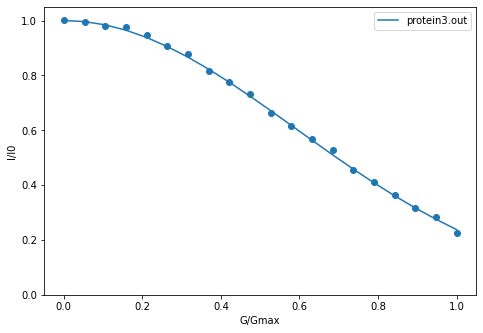

In [33]:
#COMPUTATIONAL TASK 2: take the files for the different proteins one at a time.
#show the file on the screen to look at the raw data. Do this using showfile

#Molecular weights of the proteins under study
MwList=[]
MwList.append(22123)
MwList.append(118250)
MwList.append(14230)
MwList.append(4.5*1E6)
MwList.append(623000)

#proFiles
proFiles=[] #make list of protein file names
for i in range(len(MwList)):
    proFiles.append('protein'+str(i+1)+'.out')

#choose which number: ii goes from 0 to 4.
ii=2

#What is the diffusion coefficient of each protein and standard error?
DT,DTerr=FitFile(proFiles[ii],verbose=True)  #read in data from the data file, and spit out the diffusion coefficient

#Calculate the expected diffusion coefficients for a protein of this molecular weight, folded and unfolded. Calculate eta.
fac,facErr=ExpectedD(MwList[ii],DT,DTerr,verbose=True)  #print expected diffusion coefficients for folded, and unfolded proteins.

 Protein 1 Mw: 22123 g mol$^{-1}$ $\eta:$ 0.0601 $\pm$ 0.0101 

 Protein 2 Mw: 118250 g mol$^{-1}$ $\eta:$ 0.9465 $\pm$ 0.0129 

 Protein 3 Mw: 14230 g mol$^{-1}$ $\eta:$ 0.0143 $\pm$ 0.0106 

 Protein 4 Mw: 4500000 g mol$^{-1}$ $\eta:$ 1.0013 $\pm$ 0.0276 

 Protein 5 Mw: 623000 g mol$^{-1}$ $\eta:$ 0.7721 $\pm$ 0.0162 

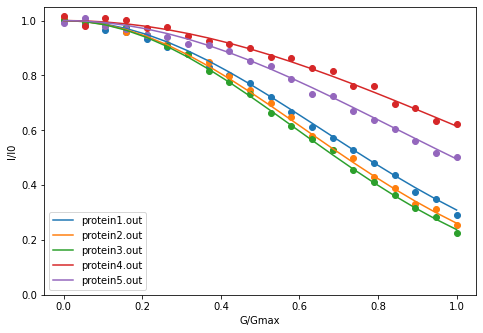

In [34]:
#COMPUTATIONAL TASK 3: take the files for the different proteins at once.
#this is a huge cheat that gives you the answers. Very important you understand how
#this all works using the previous steps otherwise this exercise is pointless.

#Molecular weights of the proteins under study
MwList=[]
MwList.append(22123)
MwList.append(118250)
MwList.append(14230)
MwList.append(4.5*1E6)
MwList.append(623000)

#proFiles
proFiles=[] #make list of protein file names
for i in range(len(MwList)):
    proFiles.append('protein'+str(i+1)+'.out')

FacFit=[]
fig,ax=SetFig()
for i in range(len(MwList)):
    #Fit the data using FitFile.
    DT,DTerr=FitFile(proFiles[i],verbose=False,ax=ax)  #read in data from the data file, and spit out the diffusion coefficient
    #What is the diffusion coefficient of this protein?
    #Calculate the expected diffusion coefficients for a protein of this molecular weight.
    fac,facErr=ExpectedD(MwList[i],DT,DTerr,verbose=False)  #print expected diffusion coefficients for folded, and unfolded proteins.
    FacFit.append((fac,facErr))
ax.legend(loc='lower left')    

for i in range(len(FacFit)):
    display(Markdown(rf' Protein %i Mw: %.0f g mol'r'$^{-1}$'rf' $\eta:$ %.4f $\pm$ %.4f ' % (i+1,MwList[i],FacFit[i][0],FacFit[i][1])))
                     
    